In [9]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


# Globe Tossing Problem

In [49]:
p_grid = np.linspace(0, 1, 100)

In [34]:
def proba_water(p):
    return p

def proba_land(p):
    return 1 - p

In [92]:
def update_prior(prior, measurement):
    '''
    updates prior depending on whether observation was WATER or LAND
    '''

    if measurement == "WATER":
        new_prior = prior * proba_water(p_grid)
    elif measurement == "LAND":
        new_prior = prior * proba_land(p_grid)

    new_prior = new_prior / np.sum(new_prior)

    return new_prior

In [117]:
prior = np.empty(100)
prior.fill(1)
prior = prior/np.sum(prior)

for i in range(0, 25):
    prior = update_prior(prior, "WATER")
for i in range(0, 25):
    prior = update_prior(prior, "LAND")
for i in range(0, 50):
    prior = update_prior(prior, "WATER")

Text(0, 0.5, 'Probability')

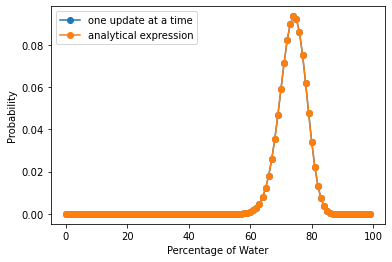

In [118]:
fig, ax = plt.subplots()
ax.plot(np.arange(100), prior, marker='o', label='one update at a time')

N=100
y=binom.pmf(N*3/4, N, p_grid)
y = y/sum(y)

ax.plot(np.arange(100), y, marker='o', label='analytical expression')

ax.legend()
ax.set_xlabel("Percentage of Water")
ax.set_ylabel("Probability")

# Problem 1

4 water and 11 land: what does the posterior look like?

Text(0, 0.5, 'Probability')

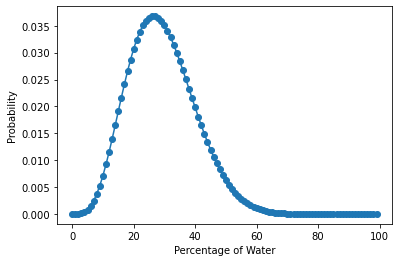

In [119]:
prior = np.empty(100)
prior.fill(1)
prior = prior/np.sum(prior)

for i in range(0, 4):
    prior = update_prior(prior, "WATER")
for i in range(0, 11):
    prior = update_prior(prior, "LAND")

fig, ax = plt.subplots()
ax.plot(np.arange(100), prior, marker='o', label='one update at a time')

ax.set_xlabel("Percentage of Water")
ax.set_ylabel("Probability")

# Problem 2

4 water and 2 land. Prior is 0 below 0.5, constant otherwise. Compute posterior.

Text(0, 0.5, 'Probability')

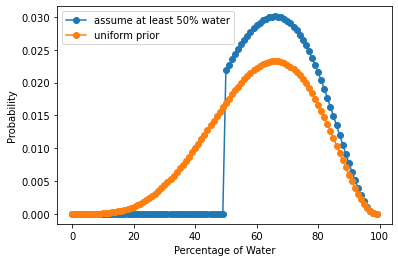

In [120]:
prior = np.empty(100)
prior.fill(1)
prior = prior*np.heaviside(p_grid - 0.5, 1)
prior = prior/np.sum(prior)

prior2 = np.empty(100)
prior2.fill(1)
prior2 = prior2/np.sum(prior2)

for i in range(0, 4):
    prior = update_prior(prior, "WATER")
    prior2 = update_prior(prior2, "WATER")
for i in range(0, 2):
    prior = update_prior(prior, "LAND")
    prior2 = update_prior(prior2, "LAND")

fig, ax = plt.subplots()
ax.plot(np.arange(100), prior, marker='o', label='assume at least 50% water')
ax.plot(np.arange(100), prior2, marker='o', label='uniform prior')

ax.legend()

ax.set_xlabel("Percentage of Water")
ax.set_ylabel("Probability")